# Hands-On Machine Learning with Scikit-Learn, Keras and TensoFlow

**Notebook Author:** Guilherme Cadori

**Date:** 2024-09-19


## Part I

### End-To-End Machine Learning Project

#### Importing Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix


#### Exploring the Data

In [18]:
housing = pd.read_csv('datasets/housing.csv')

housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
# Assessing categorical feature
housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
# Assessing numerical features
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


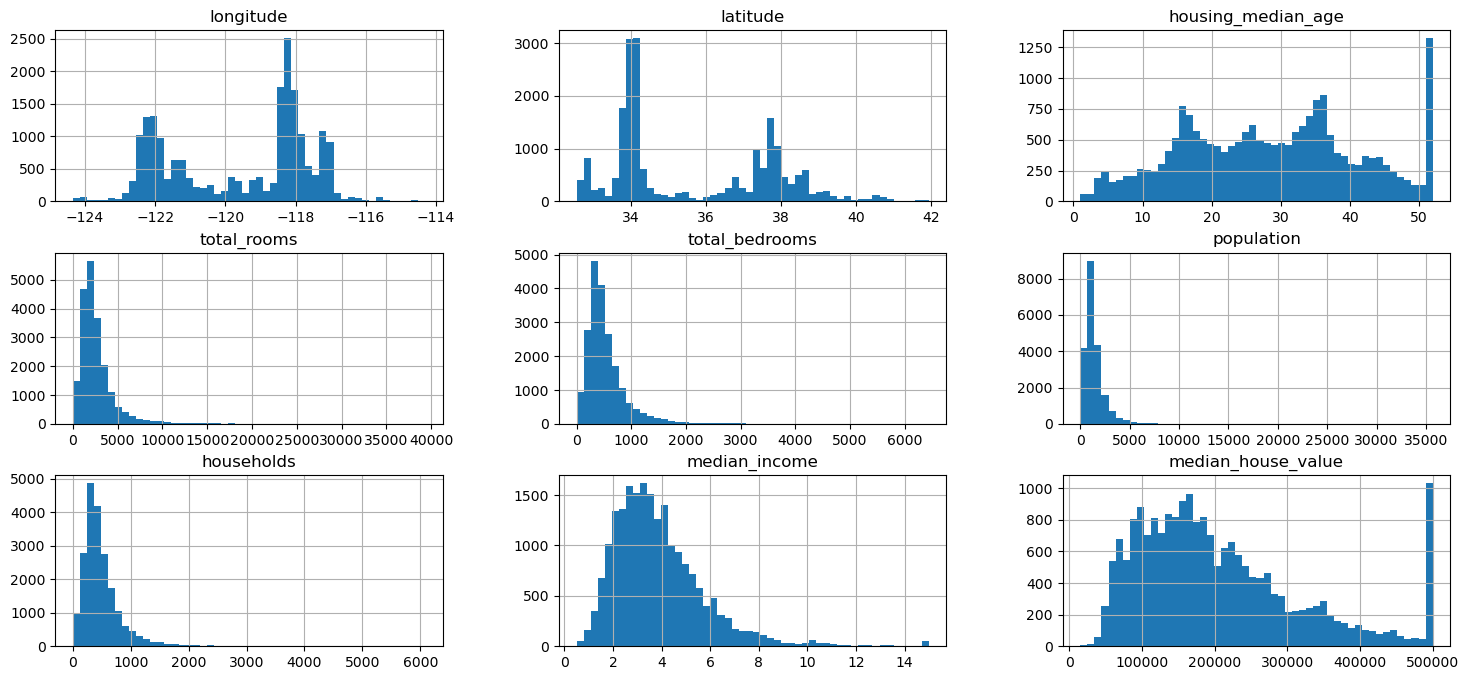

In [22]:
# Checking distributions of all numerical attributes at once
housing.hist(bins=50, figsize=(18, 8))
plt.show()


**Notes:**

- Income is expressed in tens of thousands of USD, e.g. 3 = $30,000.00

- Income was scaled and capped

- Income and some other features were preprocessed before made available online

- Having capped target is problem

- Capped target values should either be removed from training and test sets or the whole range of values for the target feature should be captured;

- Trained model will learn patterns that were partially created (e.g. capping) and do not represent reallity

- Attributes have scales that vary considerably among them

- This can be a problem if not treated properly

- Histograms demonstrate that many features are skewed right (extend much further right; mostly concentraded to the left of the distribution)
    - This can make it difficult models to learn patterns properly
    - Transforming these attributes so that we have a more symmetrical _normal_-like distributions will help with this issue

#### Create a Test Set

- Instances picked at random

- Usually around 20% of the data is set aside for the test set
    - Possible to set aside a small portion of the dataset if it is a very large dataset


In [23]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
# Creaing feautre objects
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']


In [25]:
# Using train_test_split()
'''
    The primary difference between train_test_split() and StratifiedShuffleSplit() lies in 
    how they handle the distribution of classes in the data when creating training and test sets.
    train_test_split()

        Basic Functionality:
            Splits the dataset into two sets (training and testing) based on the specified test_size.

        Class Distribution:
            By default, it does not consider the class distribution. This means that if the dataset is 
            imbalanced, the resulting training and test sets may not reflect the original class distribution.

        Usage:
            Generally used for simple train-test splits when class distribution is not a concern.
            Suitable for datasets where the target variable is uniformly distributed.

'''

# Creating train-test split
# Function train_test_split() imported: from sklearn.model_selection import train_test_split
# Random state ensures reproducibility, similarly to a random number generator's seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [26]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test), '\n')

print(y_train.describe(),'\n')
print(y_test.describe())


16512
4128
16512
4128 

count     16512.000000
mean     207140.120942
std      115480.195190
min       14999.000000
25%      119900.000000
50%      180200.000000
75%      265100.000000
max      500001.000000
Name: median_house_value, dtype: float64 

count      4128.000000
mean     205718.600775
std      115063.609892
min       14999.000000
25%      118900.000000
50%      178350.000000
75%      263800.000000
max      500001.000000
Name: median_house_value, dtype: float64


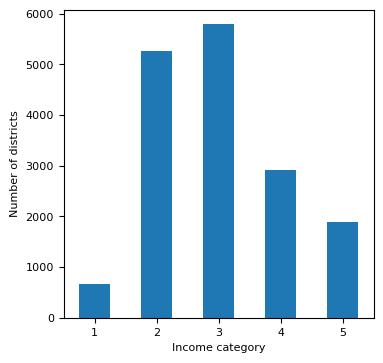

In [177]:
# Using StratifiedShuffleSplit()
'''
    StratifiedShuffleSplit()

        Basic Functionality:
            Creates multiple train-test splits while maintaining the same proportion of classes in each split.

        Class Distribution:
            Ensures that each class is represented in the training and testing sets according to its proportion 
            in the overall dataset. This is especially useful for imbalanced datasets where certain classes may 
            be underrepresented.

        Usage:
            Recommended for situations where the target variable is categorical and you want to ensure that the 
            splits maintain the original class distribution.
            Useful for cross-validation scenarios where maintaining class ratios across folds is important.
            
'''
# Function StratifiedShuffleSplit() imported: from sklearn.model_selection import StratifiedShuffleSplit
# Created categoris manually
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

plt.figure(figsize=(4, 4))

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0)

plt.xlabel("Income category")
plt.ylabel("Number of districts")

plt.show()


In [28]:
# Splitting dataset into 10 different stratifed splits
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Generate train-test splits and store them in a list
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

# # Checking a single split
# strat_train_set_n, strat_test_set_n = strat_splits[0]


In [29]:
# Getting a single split
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

# Checkign percent make up
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [30]:
# Comparing the differences between simple random sampling and stratified sampling
# extra code – computes the data for Figure 2–10
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [31]:
# Dropping column that will not be used again
strat_train_set = strat_train_set.drop(columns=['income_cat'])
strat_test_set = strat_test_set.drop(columns=['income_cat'])

#### Exploring and Visualizing Data

- If the training dataset is too large, capture a sample of it so that you can speed up data manipulation during the exploration phase

- In this case, since the dataset is small, it won't be necessary

- It is good practice to keep a copy asaide of the original since you may need to revert back to its original state at some point

In [33]:
# Creating copy
housing = strat_train_set.copy()


In [34]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

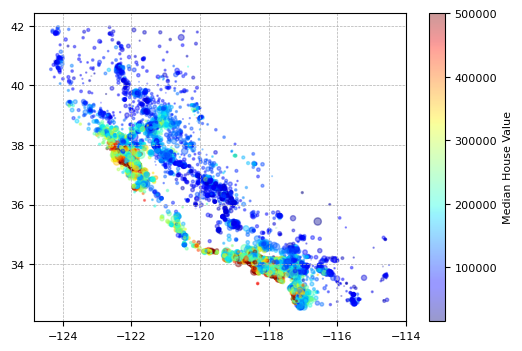

In [123]:
# Visualizing geographic component of the data
plt.figure(figsize=(6, 4))

plt.rcParams.update({'font.size': 8})

plt.scatter(x=housing['longitude'], 
            y=housing['latitude'], 
            alpha=0.4,
            s=housing['population']/250,
            c=housing['median_house_value'],
            cmap='jet')

plt.colorbar(label='Median House Value')
plt.grid(True, linewidth=0.5, linestyle='--')

plt.show()


#### Relationship Between Features


- We are going to be looking at linear relationships for now, using Pearson's lineear correlation coefficient

- We may notice relatioships in some cases where there are non-linear realationships

- In these cases, a linear correlation coefficient would not capture them properly

- We may have to use alternative approaches, such as Mutual Information


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64


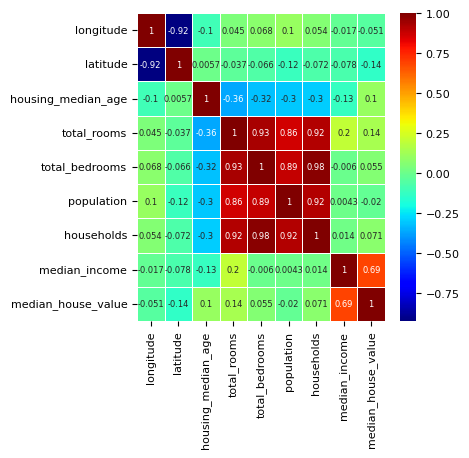

In [155]:
# Checking correlation (Pearson's correlation coefficient)
correlation_matrix = housing.corr()
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

# Creeating a correlation plot
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='jet', 
            linewidths=0.5, 
            annot_kws={'size': 6})

plt.show()


In [157]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

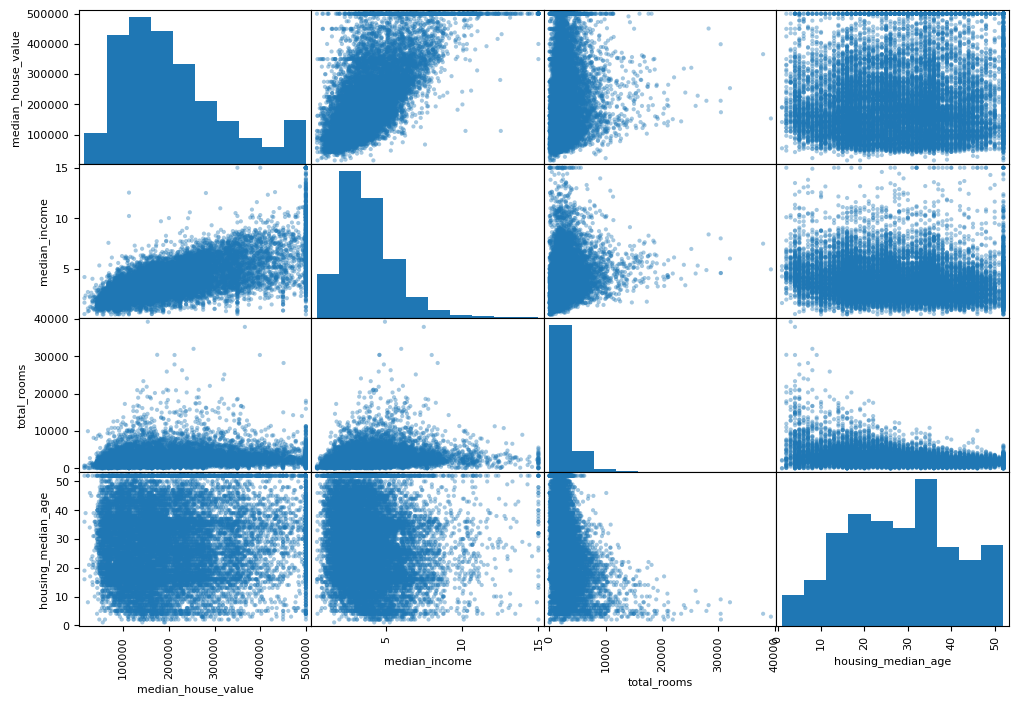

In [172]:
# Focu on the main attribute and assess relationships amongst them
main_attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[main_attributes], alpha=0.4, figsize=(12, 8))

plt.show()


**Note:** 

- Check above in the median income x median house value plot --> Straight lines (other than the USD 500,000 cap discussed earlier) near the USD 450K, USD 350K and USD 280K (maybe)

- We may have to treat these instances differently or remove them if we do not want our model to capture these "introduced" nuances


#### Experimenting with Attribute Cominations


***
**End**
***